In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

from ipywidgets import interact, widgets

%matplotlib inline

In [78]:
gapminder = pd.read_csv('gapminder.csv')

In [79]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [80]:
def plotyear(year):
    data = gapminder[gapminder.year==year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area,c=color, colormap=matplotlib.cm.get_cmap('Purples'), 
                      linewidths=1, edgecolor='k', sharex=False,
                         vmin = 55, vmax=100)

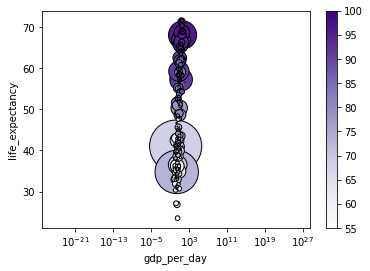

In [81]:
plotyear(1950)

In [82]:
def plotyear(year):
    data = gapminder[gapminder.year==year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area,c=color, colormap=matplotlib.cm.get_cmap('Purples'), 
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                         vmin = 55, vmax=100,
                         figsize=(10, 6))
    plt.axis(xmin=0.1, xmax=500, ymin=30, ymax=80)
   

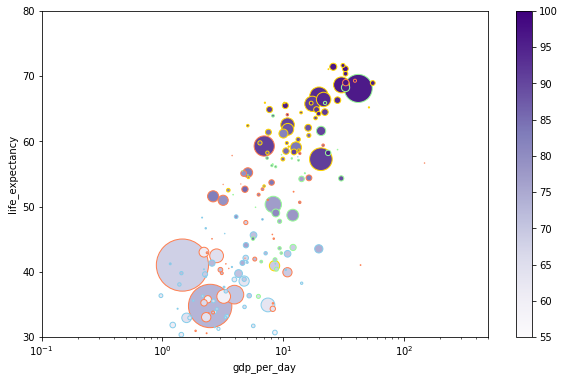

In [83]:
plotyear(1950)

In [84]:
interact(plotyear, year=range(1950, 2015))

interactive(children=(Dropdown(description='year', options=(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 19…

<function __main__.plotyear(year)>

In [89]:
gapminder[gapminder.year==2015].population.sum()

7292414176.0

In [90]:
gapminder[gapminder.year==2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115984400>,
      dtype=object)

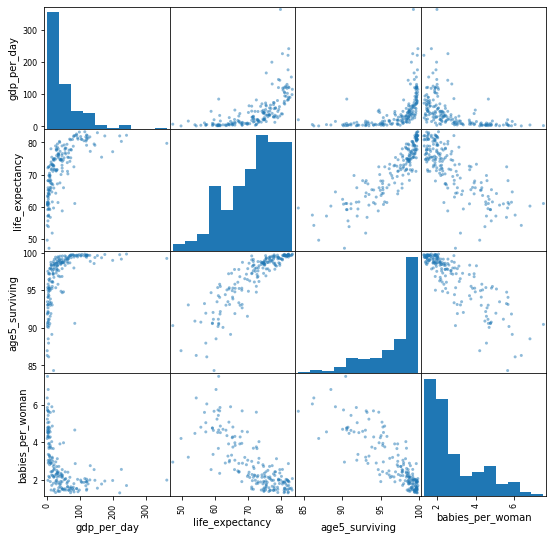

In [95]:
data = gapminder.loc[gapminder.year==2015, ['gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]

pd.plotting.scatter_matrix(data, figsize=(9, 9))